# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset

In [2]:
df = pd.read_csv("Amazon Sales FY2020-21.csv")

C:\Users\Kiran\AppData\Local\Temp\ipykernel_24704\3487896893.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Amazon Sales FY2020-21.csv")


In [3]:
df.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,Sign in date,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,01/10/2020,received,574772,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,01/10/2020,received,574774,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,01/10/2020,complete,574777,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,01/10/2020,complete,574779,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,13/11/2020,received,595185,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [4]:
df.tail()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,Sign in date,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
286387,100562365,30/09/2021,paid,905179,APPCHA5AF14939B8F8A,2,4419.9,4419.9,0.0,4419.9,...,3/21/2007,212-772-7404,Rushville,Yates,Rushville,NY,14544,Northeast,bklatham,0.0
286388,100562376,30/09/2021,cod,905191,MEFCOT5A8D1E973B886,2,39.9,39.9,0.0,39.9,...,10/24/2011,229-817-9451,Lawrenceville,Gwinnett,Lawrenceville,GA,30044,South,bmbrunetti,0.0
286389,100562383,30/09/2021,cod,905200,WOFVAL59D5EA84167F9-M,2,40.0,40.0,0.0,40.0,...,7/25/1987,252-414-8396,Durham,Durham,Durham,NC,27701,South,fngiusti,0.0
286390,100562384,30/09/2021,cod,905202,WOFNIG5B4D7EB0E9FDD-L,2,49.9,49.9,0.0,49.9,...,7/25/1987,252-414-8396,Durham,Durham,Durham,NC,27701,South,fngiusti,0.0
286391,100562386,30/09/2021,processing,905205,MATHUA5AF70A7D1E50A,2,3559.9,3559.9,0.0,3559.9,...,1/28/2015,423-276-2699,Knoxville,Knox,Knoxville,TN,37920,South,reschlosser,0.0


# displaying data frame structure

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  int64  
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  int64  
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  int64  
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

# getting the no of rows and columns

In [6]:
df.shape

(286392, 35)

# obtaining the column names of the data set

In [7]:
df.columns

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'age', 'full_name', 'E Mail', 'Sign in date', 'Phone No. ',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent'],
      dtype='object')

# checking null values

In [8]:
df.isnull().sum()

order_id            0
order_date          0
status              0
item_id             0
sku                 0
qty_ordered         0
price               0
value               0
discount_amount     0
total               0
category            0
payment_method      0
bi_st               0
cust_id             0
year                0
month               0
ref_num             0
Name Prefix         0
First Name          0
Middle Initial      0
Last Name           0
Gender              0
age                 0
full_name           0
E Mail              0
Sign in date        0
Phone No.           0
Place Name          0
County              0
City                0
State               0
Zip                 0
Region              0
User Name           0
Discount_Percent    0
dtype: int64

# Dropping Unnamed columns

In [9]:
df.isnull().sum().sum()

0

# So, Now We have no null value in the dataset

# checking duplicates

In [10]:
df.duplicated().sum()

0

# checking the data types

In [11]:
df.dtypes

order_id             object
order_date           object
status               object
item_id               int64
sku                  object
qty_ordered           int64
price               float64
value               float64
discount_amount     float64
total               float64
category             object
payment_method       object
bi_st                object
cust_id               int64
year                  int64
month                object
ref_num               int64
Name Prefix          object
First Name           object
Middle Initial       object
Last Name            object
Gender               object
age                   int64
full_name            object
E Mail               object
Sign in date         object
Phone No.            object
Place Name           object
County               object
City                 object
State                object
Zip                   int64
Region               object
User Name            object
Discount_Percent    float64
dtype: object

# Convert 'Date' column to datetime 

In [12]:
df['order_date'] = pd.to_datetime(df['order_date'])


C:\Users\Kiran\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/11/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Kiran\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21/10/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Kiran\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/12/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Kiran\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28/12/2020' in DD/MM/YYYY format. Provide format or specif

# Group by 'order_date' and sum the 'total' sales for each date

In [13]:
time_series_data = df.groupby('order_date')['total'].sum().reset_index()

# Set 'order_date' as the index

In [14]:
time_series_data.set_index('order_date', inplace=True)

# Define function for Double Exponential Smoothing

In [15]:
def double_exponential_smoothing(series, alpha, beta):
    n = len(series)
    level = series[0]
    trend = series[1] - series[0]
    smoothed = [series[0]]
    for i in range(1, n):
        prev_level, level = level, alpha * series[i] + (1 - alpha) * (level + trend)
        trend = beta * (level - prev_level) + (1 - beta) * trend
        smoothed.append(level + trend)
    return np.array(smoothed)

# Grid search for optimal alpha and beta values

In [16]:
def grid_search(series, alphas, betas):
    best_alpha, best_beta, lowest_error = None, None, float('inf')
    for alpha in alphas:
        for beta in betas:
            smoothed = double_exponential_smoothing(series, alpha, beta)
            error = np.mean(np.abs(series - smoothed))  # Mean absolute error
            if error < lowest_error:
                best_alpha, best_beta, lowest_error = alpha, beta, error
    return best_alpha, best_beta

# Define a range of alpha and beta values for grid search

In [17]:
alphas = np.arange(0.1, 1.0, 0.1)
betas = np.arange(0.1, 1.0, 0.1)

# Perform grid search to find optimal alpha and beta

In [18]:
best_alpha, best_beta = grid_search(time_series_data['total'], alphas, betas)


In [19]:
print("Best alpha:", best_alpha)
print("Best beta:", best_beta)


Best alpha: 0.9
Best beta: 0.1


# Apply double exponential smoothing with the best alpha and beta values

In [20]:
model = ExponentialSmoothing(time_series_data['total'], trend='add').fit(smoothing_level=best_alpha, smoothing_slope=best_beta)
smoothed_sales = model.fittedvalues

C:\Users\Kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kiran\AppData\Local\Temp\ipykernel_24704\4217120572.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(time_series_data['total'], trend='add').fit(smoothing_level=best_alpha, smoothing_slope=best_beta)


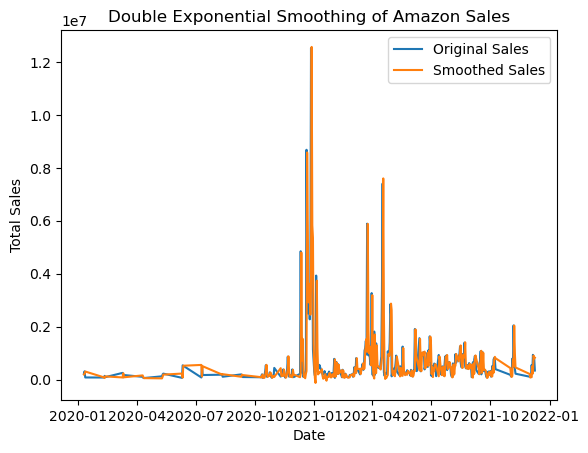

In [21]:
# Plot original and smoothed sales data
plt.plot(time_series_data.index, time_series_data['total'], label='Original Sales')
plt.plot(time_series_data.index, smoothed_sales, label='Smoothed Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Double Exponential Smoothing of Amazon Sales')
plt.legend()
plt.show()

In [22]:
mse = mean_squared_error(time_series_data['total'], smoothed_sales)
mae = mean_absolute_error(time_series_data['total'], smoothed_sales)
rmse = np.sqrt(mse)

# Calculate MSE, MAE, and RMSE

In [23]:
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 1360459979920.9119
Mean Absolute Error (MAE): 475491.69936849107
Root Mean Squared Error (RMSE): 1166387.577060435


# Moving Average (MA)

In [24]:
df['MA'] = df['total'].rolling(window=3).mean()

In [25]:
df['MA']

0                 NaN
1                 NaN
2         1062.400000
3          676.133333
4          646.100000
             ...     
286387    1543.166667
286388    1521.533333
286389    1499.933333
286390      43.266667
286391    1216.600000
Name: MA, Length: 286392, dtype: float64

# Weighted Moving Average (WMA)

In [26]:
weights = [0.3, 0.3, 0.4]  
df['WMA'] = df['total'].rolling(window=3).apply(lambda x: (x * weights).sum(), raw=True)

In [27]:
df["WMA"]

0             NaN
1             NaN
2         1076.08
3          672.44
4          591.48
           ...   
286387    1830.84
286388    1373.37
286389    1353.94
286390      43.93
286391    1450.93
Name: WMA, Length: 286392, dtype: float64

# Naïve Approach

In [28]:
df['Naive'] = df['total'].shift()

In [29]:
df['Naive']

0            NaN
1         1798.0
2          190.0
3         1199.2
4          639.2
           ...  
286387     104.8
286388    4419.9
286389      39.9
286390      40.0
286391      49.9
Name: Naive, Length: 286392, dtype: float64

# Exponential Smoothing

In [30]:
from statsmodels.tsa.api import ExponentialSmoothing
exp_smooth_model = ExponentialSmoothing(df['total'])
exp_smooth_fit = exp_smooth_model.fit()
df['Exponential_Smoothing'] = exp_smooth_fit.fittedvalues

C:\Users\Kiran\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [31]:
df['Exponential_Smoothing']

0         1114.893333
1         1377.809969
2          920.641248
3         1027.853977
4          878.267388
             ...     
286387    1990.313208
286388    2925.421613
286389    1814.831317
286390    1131.727636
286391     715.349790
Name: Exponential_Smoothing, Length: 286392, dtype: float64

# Calculate Errors

In [32]:
actual_sales = df['total']

In [33]:
sma_forecast = df['MA']
wma_forecast = df['WMA']
naive_forecast=df["Naive"]
exp_smooth_forecast =df['Exponential_Smoothing']


In [34]:
mae_sma = np.mean(np.abs(actual_sales - sma_forecast))
mae_wma = np.mean(np.abs(actual_sales - wma_forecast))
mae_exp_smooth = np.mean(np.abs(actual_sales- exp_smooth_forecast))



In [35]:
mse_sma = np.mean((actual_sales - sma_forecast)**2)
mse_wma = np.mean((actual_sales - wma_forecast)**2)
mse_exp_smooth = np.mean((actual_sales- exp_smooth_forecast)**2)


In [36]:
rmse_sma = np.sqrt(mse_sma)
rmse_wma = np.sqrt(mse_wma)
rmse_exp_smooth = np.sqrt(mse_exp_smooth)



# print MAE Errors

In [37]:
print("Mean Absolute Error (MAE):")
print(f"SMA: {mae_sma}")
print(f"WMA: {mae_wma}")
print(f"Exponential Smoothing: {mae_exp_smooth}")


Mean Absolute Error (MAE):
SMA: 412.91706216246115
WMA: 371.62535594621204
Exponential Smoothing: 641.034618119745


# print MSE Errors

In [38]:
print("\nMean Squared Error (MSE):")
print(f"SMA: {mse_sma}")
print(f"WMA: {mse_wma}")
print(f"Exponential Smoothing: {mse_exp_smooth}")



Mean Squared Error (MSE):
SMA: 1218246.2867170651
WMA: 986779.4922407232
Exponential Smoothing: 2453881.982888345


# print RMSE errors

In [39]:
print("\nRoot Mean Squared Error (RMSE):")
print(f"SMA: {rmse_sma}")
print(f"WMA: {rmse_wma}")
print(f"Exponential Smoothing: {rmse_exp_smooth}")



Root Mean Squared Error (RMSE):
SMA: 1103.7419475208258
WMA: 993.367752768693
Exponential Smoothing: 1566.4871473741318


In [40]:
#We got highest errors in Exponential and Double smoothing that indicates less forecasting accuracy. For this dataset,SMA AND WMA give us better accuracy as compared to exponential and double smoothing . So , Double smoothing has the highest errors that suggest that it may not be the most suitable model for our dataset.
#Moving Average and Weighted Moving Average are simpler but less flexible, while the Naive Approach is the simplest but least accurate method.